***Домашнее задание к уроку №1***

1. Оценить влияние скорости обучения и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подобрать скорость обучения и количества итераций до совпадения ответов алгоритма с данными МНК. Как можно ускорить процесс вычисления весов?

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [6]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [48]:
n = X.shape[0]
eta = 0.005
iterations = 3001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 500 == 0:
        print(i, w, err) #Значения по МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [1.551 2.2  ] 3173.15
500 [43.99404809  4.50865326] 51.63363194423746
1000 [46.99313195  3.95484948] 45.96853390140358
1500 [47.21450094  3.913972  ] 45.93766908018385
2000 [47.23084067  3.91095474] 45.937500921189624
2500 [47.23204674  3.91073203] 45.93750000501886
3000 [47.23213576  3.9107156 ] 45.937500000027356


Выводы:

Чем меньше скорость обучения (eta), тем меньше ошибка метода градиентного спуска в конечном счете (при большом количестве итераций). Также и с увеличением количества итераций (n) ошибка метода уменьшается. Но при этом точность метода зависит в первую очередь от скорости обучения (eta). При больших его значениях (например, я пробовал 0,1) расчет вообще не сходится, а колебается вокруг точки минимума функции производной. Точность результатов при этом очень низкая.

Скорость вычисления весов прямо пропорциональна параметру eta, поэтому для увеличения скорости расчета надо увеличивать этот параметр, при этом точность расчета будет снижаться.

Точность расчета весов прямо пропорциональна параметру n, при этом скорость расчета обратно пропорциональна этому параметру. Для увеличения скорости расчета необходимо снижать n.

Оптимально сначала определить eta, при котором расчет сходится с приемлемой точностью, а потом постепенно уменьшать n.

Для расчета в домашнем задании я выбрал eta = 0.005, n = 3000. Тогда значения весов совпадают со значениями, рассчитанными по МНК, с точностью до 5 знака после запятой.

Ниже представлены графики зависимости MSE от eta и n:

In [44]:
A = np.array([0.001, 0.002, 0.003, 0.004, 0.005])
B = np.array([176, 62, 48, 47, 47])
C = np.array([1000, 1500, 2000, 2500, 3000])
D = np.array([176, 92, 62, 52, 48])

Text(0, 0.5, 'MSE')

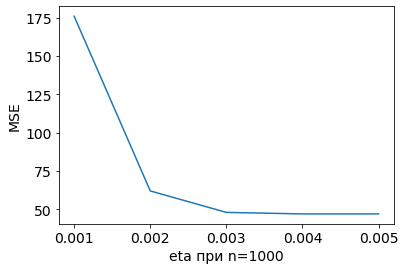

In [46]:
plt.plot(A, B)
plt.xlabel('eta при n=1000')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

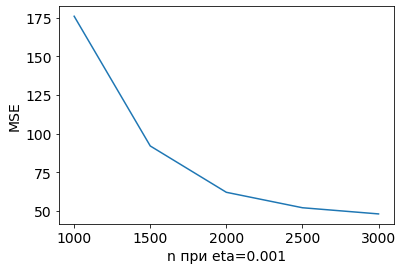

In [47]:
plt.plot(C, D)
plt.xlabel('n при eta=0.001')
plt.ylabel('MSE')

2*. Исправить ошибку в коде:

In [62]:
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * (X.T @ (y_pred - y))))
    if i % 500 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.551 2.2  ] 3173.15
500 [43.99404809  4.50865326] 51.63363194423746
1000 [46.99313195  3.95484948] 45.96853390140358
1500 [47.21450094  3.913972  ] 45.93766908018385
2000 [47.23084067  3.91095474] 45.937500921189624
2500 [47.23204674  3.91073203] 45.93750000501886
3000 [47.23213576  3.9107156 ] 45.937500000027356


In [ ]:
Я убрал операцию суммирования, т.к. она выполняется внутри функции скалярного произведения векторов numpy.

3*.Задать условие остановки итераций при снижении ошибки за итерацию до заданного значения.

In [71]:
w = np.array([1, 0.5])
eta = 0.01
i = 0
diff = 1e-6
err2 = 0
while True:
    y_pred = np.dot(w, X.T)
    err1 = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * (X.T @ (y_pred - y))))
    delta_err = np.abs(err1 - err2)
    i +=1
    if delta_err < diff:
      break
    err2 = err1
    if i % 100 == 0:
        print(i, w, err)

100 [31.72648327  6.77395294] 45.9375
200 [41.78014899  4.91746666] 45.9375
300 [45.3151501   4.26470166] 45.9375
400 [46.55810299  4.0351809 ] 45.9375
500 [46.99514157  3.95447839] 45.9375
600 [47.14881009  3.92610232] 45.9375
700 [47.20284196  3.91612492] 45.9375
800 [47.22184028  3.91261674] 45.9375


При заданных eta = 0.01 и diff = 1e-6 цикл завершится на 809 итерации.